In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from sklearn import metrics 

In [2]:
med_data = pd.read_csv("insurance.csv")

In [3]:
med_data.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [5]:
med_data.shape

(1338, 7)

In [6]:
med_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
med_data['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [10]:
#converting the labels as numerical values
med_data['smoker'] = med_data['smoker'].apply(lambda x:1 if x=='yes' else 0 )

In [11]:
print(med_data['smoker'])

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64


In [13]:
med_data['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [14]:
#converting the labels as numerical values
med_data['sex'] = med_data['sex'].apply(lambda x:1 if x=='male' else 0 )
print(med_data['sex'])

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex, Length: 1338, dtype: int64


In [15]:
med_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [16]:
med_data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [17]:
#converting the labels as numerical values
region_mapping = {'southeast':0,'southwest':1,'northwest':2,'northeast':3}
med_data['region'] = med_data['region'].map(region_mapping)

In [18]:
print(med_data['region'])

0       1
1       0
2       0
3       2
4       2
       ..
1333    2
1334    3
1335    0
1336    1
1337    2
Name: region, Length: 1338, dtype: int64


In [19]:
med_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


In [20]:
#data splitting
x = med_data.drop(columns='charges',axis=1)
y = med_data['charges']

In [21]:
#splitting the data into training and test data

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [23]:
#model training
linreg = LinearRegression()

In [27]:
linreg.fit(x_train,y_train)

LinearRegression()

In [39]:
#model evaluation

train_data_pre = linreg.predict(x_train)
error_score = metrics.r2_score(y_train,train_data_pre)
print(error_score)

0.7415700001111735


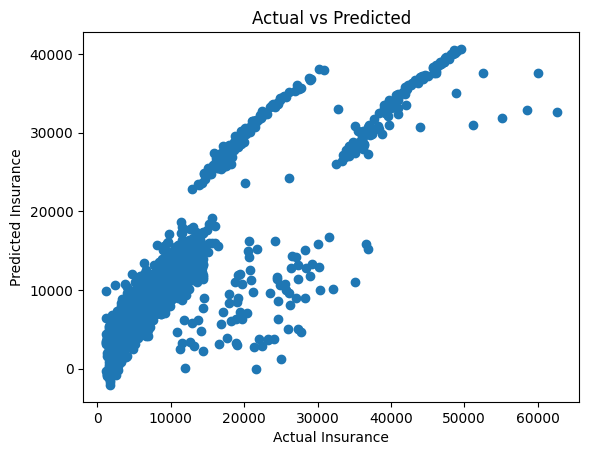

In [43]:
#visualize the actual price
plt.scatter(y_train,train_data_pre)
plt.xlabel("Actual Insurance")
plt.ylabel("Predicted Insurance")
plt.title("Actual vs Predicted")
plt.show()